In [52]:
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('the number of rows: ',df.shape[0])
print('the number of columns: ',df.shape[1])

the number of rows:  768
the number of columns:  7


In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
df=df.rename(columns={'Region' : 'States', ' Date' : 'Date',' Frequency': 'Frequency' ,
                        ' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp',
                        ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop=True)

In [7]:
df['Est_Emp'] = round((df['Est_Emp']/1000000),2)
df.head(2)

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   States           740 non-null    object 
 1   Date             740 non-null    object 
 2   Frequency        740 non-null    object 
 3   Est_Unemp_Rate   740 non-null    float64
 4   Est_Emp          740 non-null    float64
 5   Est_Labour_Rate  740 non-null    float64
 6   Area             740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [9]:
df.isnull().sum()

States             28
Date               28
Frequency          28
Est_Unemp_Rate     28
Est_Emp            28
Est_Labour_Rate    28
Area               28
dtype: int64

In [10]:
# Checking for percentage of missing value
print(round(df.isnull().sum()/df.shape[0]*100,2))

States             3.65
Date               3.65
Frequency          3.65
Est_Unemp_Rate     3.65
Est_Emp            3.65
Est_Labour_Rate    3.65
Area               3.65
dtype: float64


In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(740, 7)

In [53]:
df['Date']=pd.to_datetime(df['Date'])
df['Area']=df['Area'].astype('category')

In [14]:
df.dtypes

States                     object
Date               datetime64[ns]
Frequency                  object
Est_Unemp_Rate            float64
Est_Emp                   float64
Est_Labour_Rate           float64
Area                     category
dtype: object

In [15]:
df.drop('Frequency',axis=1,inplace=True)

In [16]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [17]:
df['Month_Name']=df['Date'].dt.month_name()

In [18]:
df.head(2)

,States,Date,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Area,Year,Month,Month_Name
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5,May
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6,June


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   States           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Est_Unemp_Rate   740 non-null    float64       
 3   Est_Emp          740 non-null    float64       
 4   Est_Labour_Rate  740 non-null    float64       
 5   Area             740 non-null    category      
 6   Year             740 non-null    int32         
 7   Month            740 non-null    int32         
 8   Month_Name       740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), int32(2), object(2)
memory usage: 47.1+ KB


In [20]:
df_stat = df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(df_stat.describe(),2)

,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate
count,740.00,740.00,740.00
mean,11.79,7.20,42.63
std,10.72,8.09,8.11
min,0.00,0.05,13.33
25%,4.66,1.19,38.06
50%,8.35,4.74,41.16
75%,15.89,11.28,45.50
max,76.74,45.78,72.57


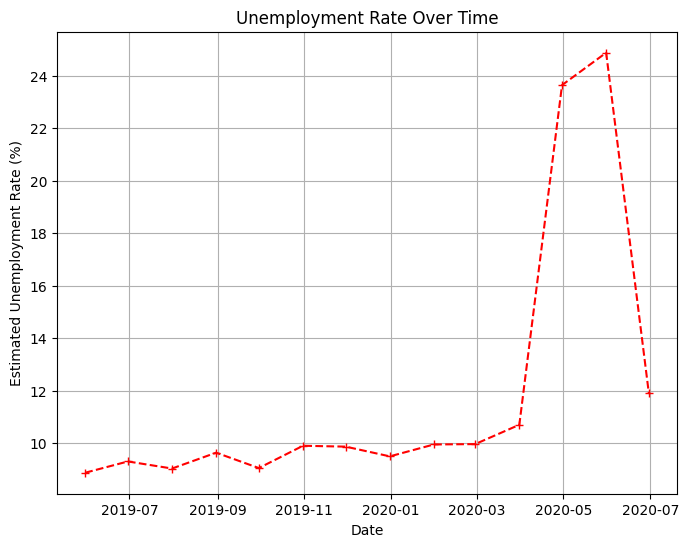

In [21]:
import matplotlib.pyplot as plt
mean_unemployment=df.groupby('Date')['Est_Unemp_Rate'].mean()

plt.figure(figsize=(8,6))
plt.plot(mean_unemployment,marker='+',linestyle='--',color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)
plt.show()

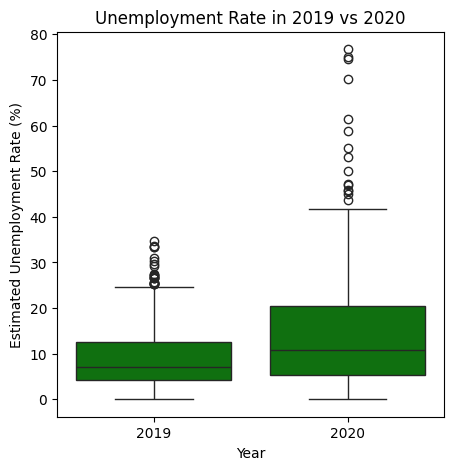

In [22]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.boxplot(y=df['Est_Unemp_Rate'],x=df['Year'],color='green')
plt.xlabel('Year')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate in 2019 vs 2020')
plt.show()

In [23]:
df.head()

,States,Date,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Area,Year,Month,Month_Name
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5,May
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6,June
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural,2019,7,July
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural,2019,8,August
4,Andhra Pradesh,2019-09-30,5.17,12.26,44.68,Rural,2019,9,September


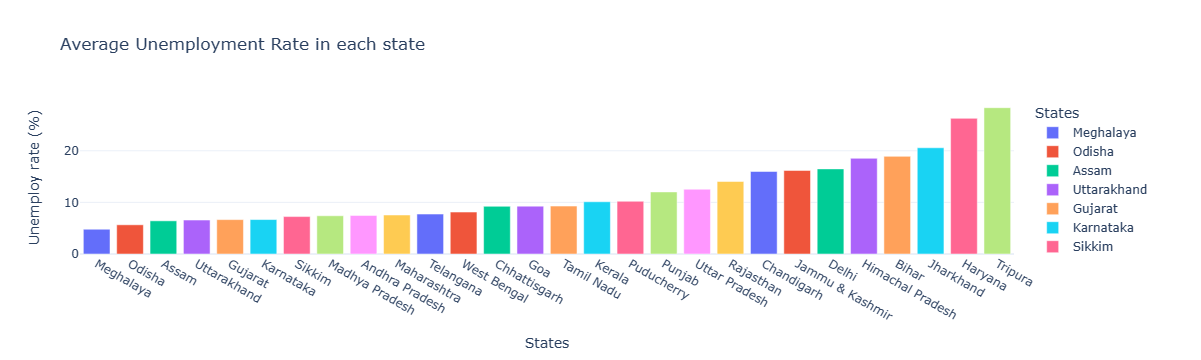

In [37]:
import plotly.express as px
df_uemp=df[['Est_Unemp_Rate','States']].groupby('States').mean().reset_index()
df_uemp.sort_values(by='Est_Unemp_Rate',inplace=True)
fig=px.bar(df_uemp,x='States',y='Est_Unemp_Rate',color='States',title='Average Unemployment Rate in each state',template='plotly_white',
          labels={'Est_Unemp_Rate':'Unemploy rate (%)'})
fig.show()

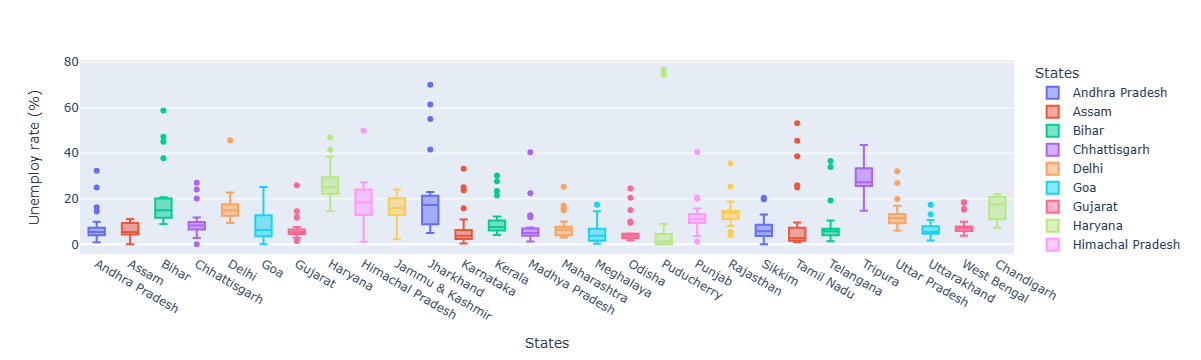

In [41]:
fig=px.box(df,x='States',y='Est_Unemp_Rate',color='States',template='plotly',labels={'Est_Unemp_Rate':'Unemploy rate (%)'})
fig.show()

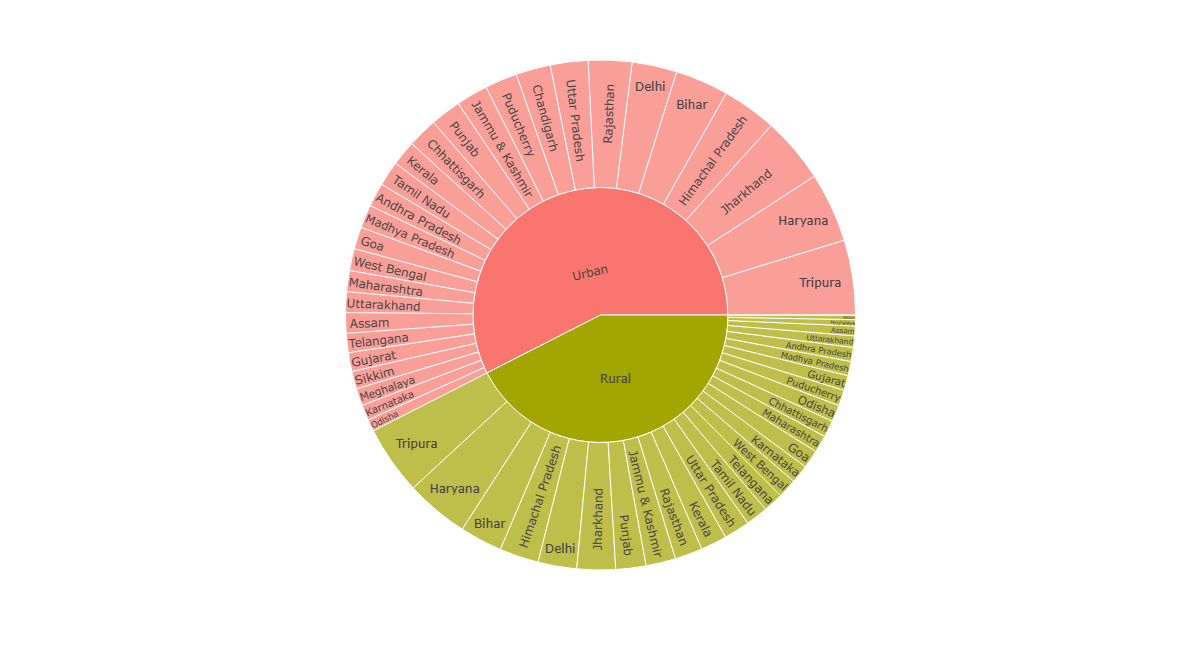

In [75]:
fig=px.sunburst(df,path=['Area', 'States'],values='Est_Unemp_Rate',template='ggplot2',height=650)
fig.show()

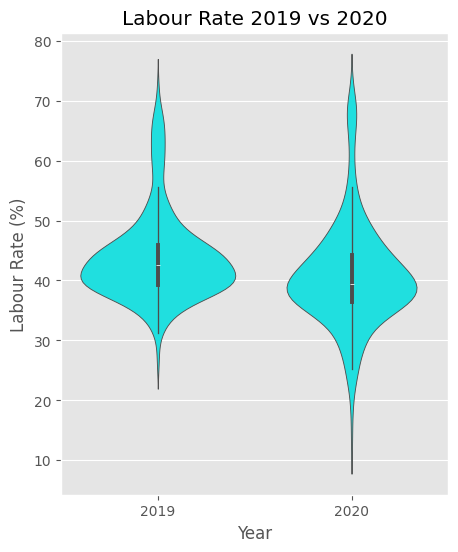

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(5,6))
sns.violinplot(x=df['Year'],y=df['Est_Labour_Rate'],color='cyan')
plt.title('Labour Rate 2019 vs 2020')
plt.ylabel('Labour Rate (%)')
plt.show()

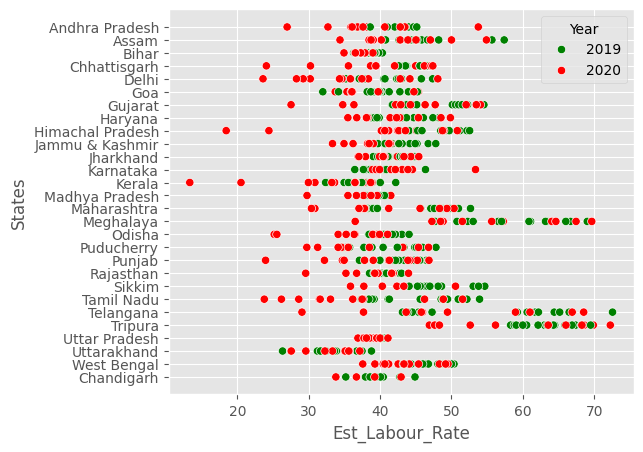

In [68]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Est_Labour_Rate'],y=df['States'],hue=df['Year'],palette=['green','red'])
plt.show()

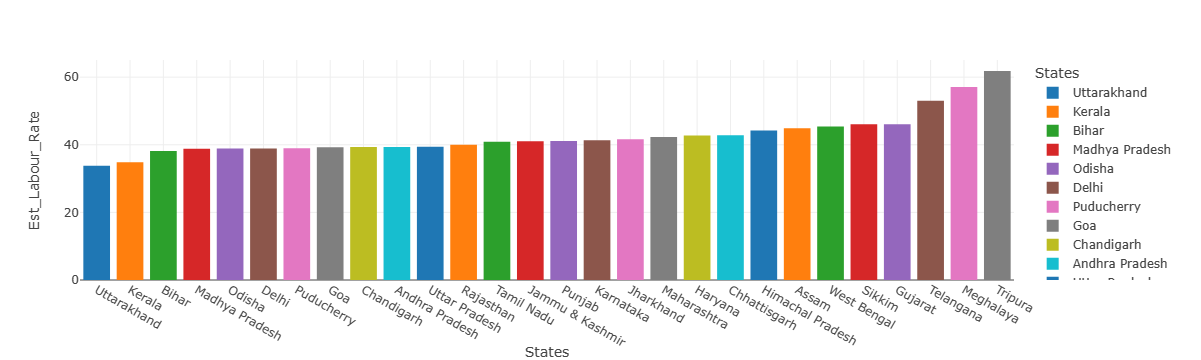

In [73]:
df_lr=df[['Est_Labour_Rate','States']].groupby('States').mean().reset_index()
df_lr.sort_values(by='Est_Labour_Rate',inplace=True)
fig=px.bar(df_lr,x='States',y='Est_Labour_Rate',color='States',template='gridon')
fig.show()

In [76]:
area_stats = df.groupby(['Area'])[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(area_stats.describe(),2).T

Area                    Rural   Urban
Est_Unemp_Rate  count  359.00  381.00
                mean    10.32   13.17
                std     10.04   11.17
                min      0.00    0.00
                25%      3.79    5.82
                50%      6.76    9.97
                75%     13.76   18.04
                max     74.51   76.74
Est_Emp         count  359.00  381.00
                mean    10.19    4.39
                std      9.85    4.41
                min      0.05    0.06
                25%      2.02    0.78
                50%      7.51    2.82
                75%     14.76    5.76
                max     45.78   17.49
Est_Labour_Rate count  359.00  381.00
                mean    44.46   40.90
                std      8.85    6.92
                min     13.33   20.51
                25%     39.05   37.42
                50%     42.56   40.21
                75%     48.15   44.18
                max     72.57   72.26

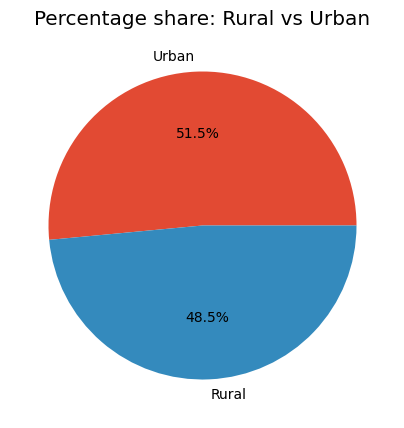

In [89]:
plt.figure(figsize=(5,5))
plt.pie(df['Area'].value_counts(),labels=df['Area'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage share: Rural vs Urban')
plt.show()

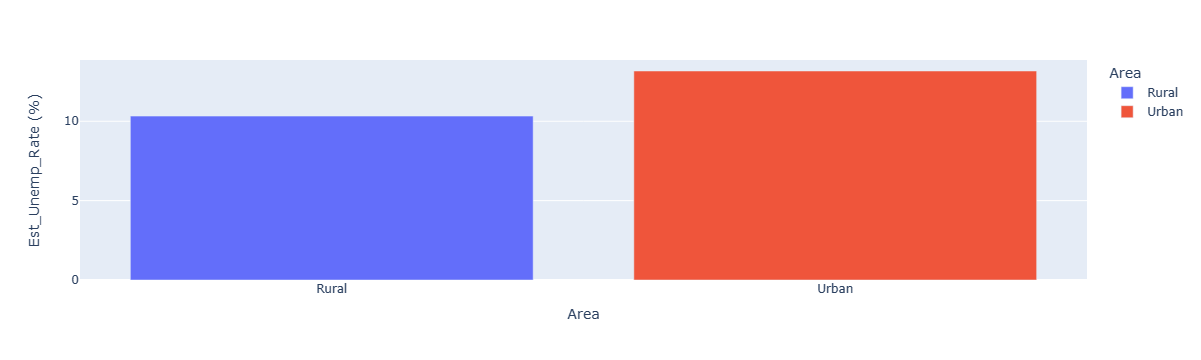

In [93]:
df_ar_unemp = df[['Est_Unemp_Rate', 'Area']].groupby('Area').mean().reset_index()
fig=px.bar(df_ar_unemp,x='Area',y='Est_Unemp_Rate',color='Area',labels={'Est_Unemp_Rate':'Est_Unemp_Rate (%)'})
fig.show()

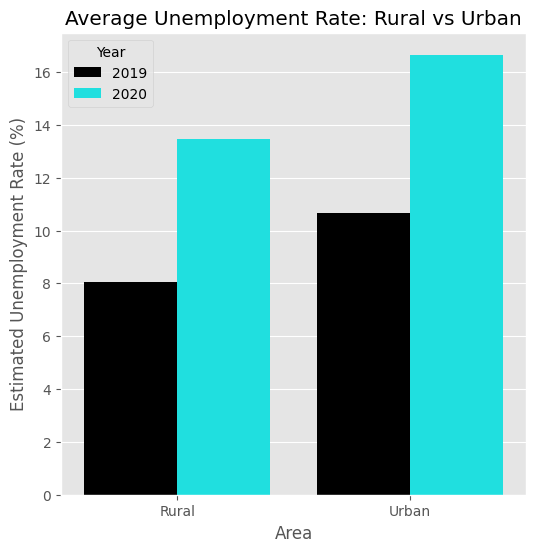

In [104]:
plt.figure(figsize=(6,6))
sns.barplot(x=df['Area'],y=df['Est_Unemp_Rate'],hue=df['Year'],estimator='mean',errorbar=None,palette={2019: "black", 2020: "cyan"})
plt.xlabel('Area')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Average Unemployment Rate: Rural vs Urban')
plt.show()

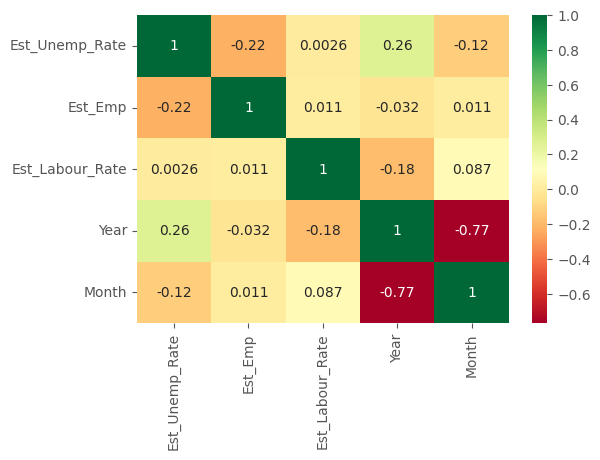

In [114]:
df_htmp=df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate', 'Year', 'Month']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_htmp,annot=True,cmap='RdYlGn')
plt.show()

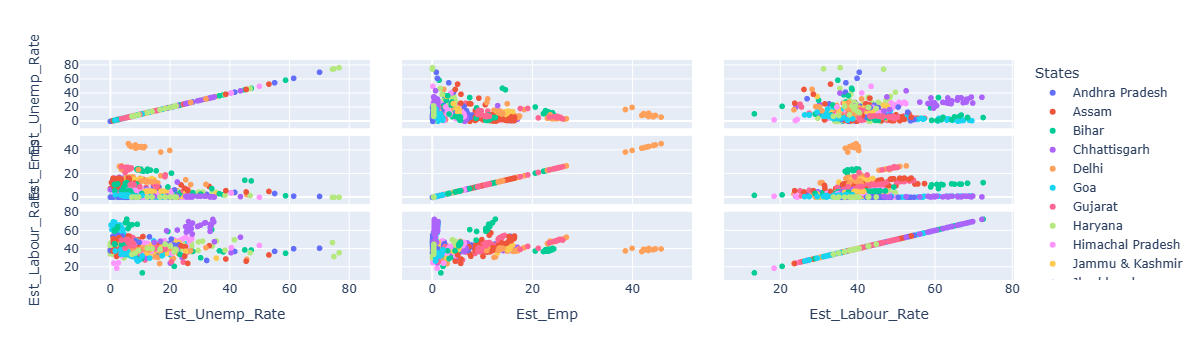

In [116]:
fig=px.scatter_matrix(df,dimensions=['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate'],color='States')
fig.show()

In [117]:
# Creating new dataframes for before and after lockdown period during the same months

before_lockdown = df[(df['Month'] >= 4) & (df['Month'] <= 6) & (df['Year'] ==2019)]
after_lockdown = df[(df['Month'] >= 4) & (df['Month'] <= 6) & (df['Year'] ==2020)]

In [118]:
# Calculating the mean unemployment rate before lockdown by state

bf_lockdown= before_lockdown.groupby('States')['Est_Unemp_Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state

af_lockdown = after_lockdown.groupby('States')['Est_Unemp_Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state

combined_df = pd.merge(bf_lockdown, af_lockdown, on='States')

combined_df.columns=['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
combined_df.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,4.1475,15.778333
1,Assam,6.7825,6.388000
2,Bihar,13.1650,36.988333
3,Chandigarh,15.3750,7.220000
4,Chhattisgarh,9.5300,14.846667


In [119]:
# Percentage change in unemployment rate

combined_df['Rate Change in Unemployment'] = round(combined_df['Unemployment Rate After Lockdown'] - combined_df['Unemployment Rate Before Lockdown']/combined_df['Unemployment Rate Before Lockdown'],2)
percent_change_df = combined_df.sort_values('Rate Change in Unemployment')

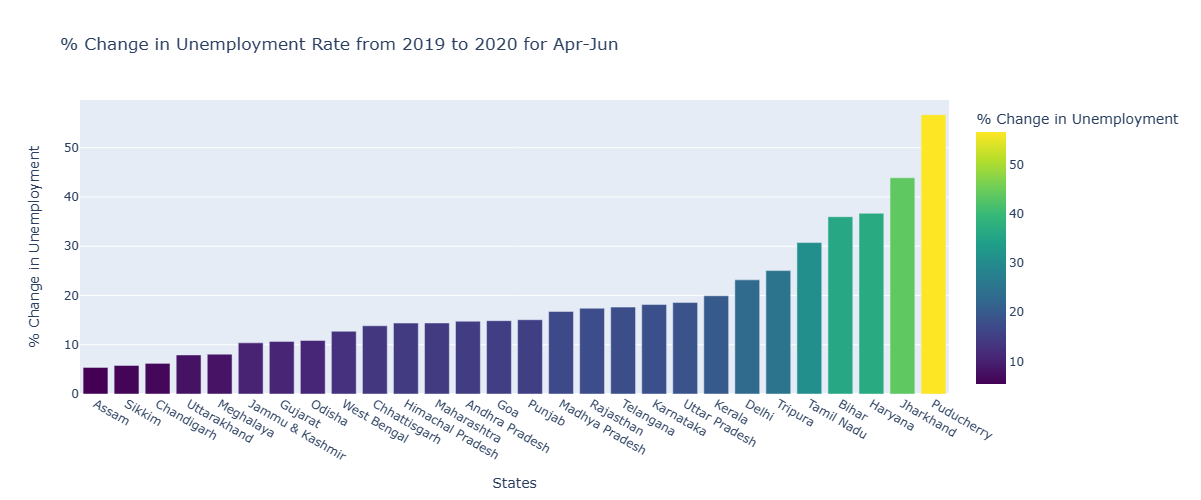

In [124]:
# Percentage change in unemployment after lockdown

fig = px.bar(percent_change_df, x='States',y='Rate Change in Unemployment',color='Rate Change in Unemployment',
            labels={ 'Rate Change in Unemployment' : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()